This is a starter notebook demonstrating how to use the routines in BDspectroscopy_utilities.py to read in spectra from the SpeX Prism library.

# Imports

In [156]:
import os

import matplotlib.pyplot as plt
import astropy.io.fits as FITS

import pandas as pd

import pickle

import re

# Read in metadata about SpeX Prism library

In [157]:
df = pd.read_csv('SPEX-PRISM/spectral_data.txt', delim_whitespace=False, sep='\t')
df

,DATA_KEY,SOURCE_KEY,DATA_FILE,INSTRUMENT,OBSERVATION_DATE,OBSERVATION_TIME,JULIAN_DATE,PROGRAM_NUMBER,PROGRAM_PI,OBSERVER,...,REDUCTION_SPEXTOOL_VERSION,REDUCTION_PERSON,REDUCTION_DATE,QUALITY_FLAG,MEDIAN_SNR,SPEX_TYPE,SPEX_GRAVITY_CLASSIFICATION,PUBLISHED,DATA_REFERENCE,NOTE
0,10001,10443,10001_10443.fits,SPEX-PRISM,20001106,12 16 5.2351810,51855.011,NaN,NaN,Rayner,...,v3.5b,NaN,NaN,OK,224.000000,L5.0,FLD-G,Y,2004PASP..116..362C,NaN
1,10002,10782,10002_10782.fits,SPEX-PRISM,20030521,NaN,52780.500,NaN,NaN,Burgasser,...,NaN,Mercado,NaN,OK,114.000000,L5.0,FLD-G,Y,2004AJ....127.2856B,NaN
2,10003,10830,10003_10830.fits,SPEX-PRISM,20030521,NaN,52780.500,NaN,NaN,Burgasser,...,NaN,Mercado,NaN,POOR,23.000000,M6.0,NaN,Y,2004AJ....127.2856B,NaN
3,10004,10916,10004_10916.fits,SPEX-PRISM,20030521,NaN,52780.500,NaN,NaN,Burgasser,...,NaN,Mercado,NaN,OK,39.000000,T6.0,NaN,Y,2004AJ....127.2856B,NaN
4,10005,11020,10005_11020.fits,SPEX-PRISM,20030521,NaN,52780.500,NaN,NaN,Burgasser,...,NaN,Mercado,NaN,OK,44.000000,M7.0,VL-G,Y,2004AJ....127.2856B,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,13100,12830,13100_12830.fits,SPEX-PRISM,20171007,15 00 11.751287,58033.625,2017B092,Burgasser,Burgasser,...,v4.0.4,Burgasser,20171007.0,OK,108.190895,M8.0,FLD-G,N,BURGASSER-NP,NaN
3085,13101,12831,13101_12831.fits,SPEX-PRISM,20171007,15 00 11.751287,58033.625,2017B092,Burgasser,Burgasser,...,v4.0.4,Burgasser,20171007.0,OK,40.260468,M8.0,FLD-G,N,BURGASSER-NP,NaN
3086,13102,12832,13102_12832.fits,SPEX-PRISM,20171007,15 22 17.974253,58033.640,2017B092,Burgasser,Burgasser,...,v4.0.4,Burgasser,20171007.0,OK,167.808014,d/sdM6,NaN,N,BURGASSER-NP,NaN
3087,13103,12833,13103_12833.fits,SPEX-PRISM,20171007,14 33 41.798042,58033.607,2017B092,Burgasser,Burgasser,...,v4.0.4,Burgasser,20171007.0,OK,197.489761,M6.0,NaN,N,BURGASSER-NP,NaN


First remove entries from table that aren't in downloaded library

In [158]:
dir_name = 'SPEX-PRISM'
dir_files = os.listdir(dir_name)

drop = []
for index, row in df.iterrows():
    if row['DATA_FILE'] not in dir_files:
        print(row['DATA_FILE'])
        drop.append(index)
        
df = df.drop(index=drop)

10018_10948.fits
10053_11464.fits
10055_11938.fits
10056_10142.fits
10057_11055.fits
10059_11118.fits
10060_11320.fits
10062_11616.fits
10064_11619.fits
10065_11627.fits
10068_11692.fits
10069_10003.fits
10070_10044.fits
10074_10272.fits
10075_10437.fits
10076_11155.fits
10077_11155.fits
10078_11202.fits
10079_11322.fits
10080_11449.fits
10082_11544.fits
10085_10062.fits
10088_10165.fits
10089_10184.fits
10090_10278.fits
10093_11145.fits
10097_11648.fits
10100_11707.fits
10101_10023.fits
10103_10190.fits
10104_10239.fits
10105_10240.fits
10108_10455.fits
10109_10457.fits
10111_11104.fits
10112_11110.fits
10114_11179.fits
10116_11400.fits
10117_11408.fits
10121_11612.fits
10161_10566.fits
10165_10436.fits
10167_10474.fits
10168_10500.fits
10169_10512.fits
10172_10691.fits
10173_10698.fits
10177_10973.fits
10178_10989.fits
10179_10447.fits
10180_10494.fits
10182_10507.fits
10184_10608.fits
10187_10697.fits
10192_10939.fits
10193_10989.fits
10195_11044.fits
10199_11223.fits
10201_11129.fi

13095_12825.fits
13096_12826.fits
13097_12827.fits
13098_12828.fits
13099_12829.fits
13100_12830.fits
13101_12831.fits
13102_12832.fits
13103_12833.fits
13104_12834.fits


Identify spectral types represented in SpeX Prism library

In [159]:
spec_types = []
print(len(df))

for index, row in df.iterrows():
    spex_type = row['SPEX_TYPE']
    try:
        spectral_type = re.search(r'[A-Z]\d', spex_type).group()
        print(row['DATA_FILE']+':', spectral_type)
        spec_types.append(spectral_type)
    except:
        print('Error: ', row['DATA_FILE'], ' has spex type', row['SPEX_TYPE'])
        spec_types.append(None)

df['SPEC_TYPE'] = spec_types

2047
10001_10443.fits: L5
10002_10782.fits: L5
10003_10830.fits: M6
10004_10916.fits: T6
10005_11020.fits: M7
10006_11159.fits: M7
10007_11195.fits: M7
10008_11269.fits: M7
10009_11343.fits: M6
Error:  10010_11344.fits  has spex type nan
10011_11349.fits: M4
10012_11393.fits: M7
10013_11416.fits: T5
10014_10817.fits: M8
10015_10836.fits: M6
10016_10874.fits: T3
10017_10945.fits: T2
10019_11040.fits: M7
10020_11100.fits: T7
10021_11106.fits: T5
10022_11137.fits: M7
10023_11236.fits: T6
10024_11252.fits: M7
10025_11254.fits: T0
10026_11270.fits: M6
10027_11387.fits: M7
Error:  10028_11425.fits  has spex type nan
10029_11479.fits: M7
Error:  10030_11507.fits  has spex type nan
Error:  10031_11571.fits  has spex type nan
10032_10787.fits: M7
10033_10801.fits: M7
10034_10874.fits: T3
10035_10877.fits: M7
10036_10903.fits: T6
10037_10987.fits: M7
10038_11075.fits: L1
10039_11138.fits: L5
10040_11190.fits: M8
10041_11267.fits: M8
10042_11301.fits: L1
10043_11300.fits: L1
10044_11326.fits: M6


12329_10802.fits: L9
12330_12064.fits: L1
12331_12065.fits: L2
12332_12066.fits: L5
12333_11971.fits: T0
12334_12068.fits: M7
12335_12069.fits: L1
12336_12070.fits: L2
12337_11004.fits: T0
12338_12072.fits: T0
12339_12073.fits: T0
12340_12074.fits: L1
12341_12075.fits: L1
12342_12076.fits: L1
12343_12077.fits: L2
12344_12078.fits: L0
12345_12079.fits: M8
Error:  12346_12080.fits  has spex type nan
12347_12081.fits: L1
12348_12082.fits: L5
12349_12083.fits: L1
12350_12084.fits: M8
12351_11570.fits: L2
12352_12086.fits: M8
12353_12087.fits: M8
12354_12088.fits: T1
12355_12089.fits: L1
12356_11934.fits: L5
12357_12091.fits: T0
12358_12092.fits: L1
12359_11979.fits: T2
12360_11659.fits: M8
12361_12095.fits: L4
12362_12096.fits: L1
12363_11696.fits: T6
12364_11078.fits: L5
12396_10550.fits: L7
12397_10685.fits: L6
12398_12131.fits: L7
12399_12132.fits: L7
12400_12133.fits: L6
12401_12134.fits: T0
12402_11005.fits: L6
12403_12136.fits: T0
12404_12137.fits: L6
12405_12138.fits: L2
12406_11207

All spectral types found above seem logical. All errors found above are outside our classification scheme.

Group data files by spectral type.

In [160]:
data_files = list(df['DATA_FILE'])
spec_types_set = set(spec_types)
spec_types_set.remove(None)
spec_types_set = sorted(list(set(spec_types_set)))

SpT_data_matches = []
for spec_type in spec_types_set:
    print(spec_type)
    matches = list(df['DATA_FILE'].loc[df['SPEC_TYPE'] == spec_type])
    print(matches)
    SpT_data_matches.append(matches)

L0
['10066_11656.fits', '10098_11657.fits', '10107_10315.fits', '10747_10469.fits', '10755_10680.fits', '10845_10199.fits', '10980_10854.fits', '11008_11146.fits', '11076_10097.fits', '11100_11226.fits', '11109_11047.fits', '11230_10612.fits', '11234_11303.fits', '11242_11492.fits', '11243_11494.fits', '11268_10058.fits', '11286_11677.fits', '11291_11437.fits', '11292_11460.fits', '11554_11419.fits', '11604_10430.fits', '11624_10752.fits', '11636_11001.fits', '11658_11293.fits', '11694_10049.fits', '11802_11217.fits', '11840_10731.fits', '11926_10387.fits', '12196_11933.fits', '12227_11963.fits', '12344_12078.fits', '12409_12142.fits', '12424_12157.fits', '12453_12186.fits', '12462_12195.fits', '12468_12201.fits', '12473_12206.fits', '12478_12211.fits', '12488_12221.fits', '12491_12224.fits', '12502_12235.fits', '12505_12238.fits', '12512_12245.fits', '12515_12248.fits', '12516_12249.fits', '12531_12264.fits', '12537_12270.fits', '12664_12393.fits', '12671_12400.fits', '12720_10403.fit

Save table (technically a Python dictionary) of data files corresponding to a given spectral type to a pickle file

In [161]:
SpT_data_dict = {spec_types_set[i]:SpT_data_matches[i] for i in range(len(spec_types_set))}

with open('SPEX-PRISM/spectral_data.pkl', 'wb') as fp:
    pickle.dump(SpT_data_dict, fp)
    print('Dictionary saved successfully to file')

Dictionary saved successfully to file


Read in pickle to ensure it's formatted correctly

In [162]:
with open('SPEX-PRISM/spectral_data.pkl', 'rb') as fp:
    SpT_data_dict = pickle.load(fp)

SpT_data_dict['L0']

['10066_11656.fits',
 '10098_11657.fits',
 '10107_10315.fits',
 '10747_10469.fits',
 '10755_10680.fits',
 '10845_10199.fits',
 '10980_10854.fits',
 '11008_11146.fits',
 '11076_10097.fits',
 '11100_11226.fits',
 '11109_11047.fits',
 '11230_10612.fits',
 '11234_11303.fits',
 '11242_11492.fits',
 '11243_11494.fits',
 '11268_10058.fits',
 '11286_11677.fits',
 '11291_11437.fits',
 '11292_11460.fits',
 '11554_11419.fits',
 '11604_10430.fits',
 '11624_10752.fits',
 '11636_11001.fits',
 '11658_11293.fits',
 '11694_10049.fits',
 '11802_11217.fits',
 '11840_10731.fits',
 '11926_10387.fits',
 '12196_11933.fits',
 '12227_11963.fits',
 '12344_12078.fits',
 '12409_12142.fits',
 '12424_12157.fits',
 '12453_12186.fits',
 '12462_12195.fits',
 '12468_12201.fits',
 '12473_12206.fits',
 '12478_12211.fits',
 '12488_12221.fits',
 '12491_12224.fits',
 '12502_12235.fits',
 '12505_12238.fits',
 '12512_12245.fits',
 '12515_12248.fits',
 '12516_12249.fits',
 '12531_12264.fits',
 '12537_12270.fits',
 '12664_12393

# Read in files from SpeX Prism library

Plot all L0 spectra

10066_11656.fits


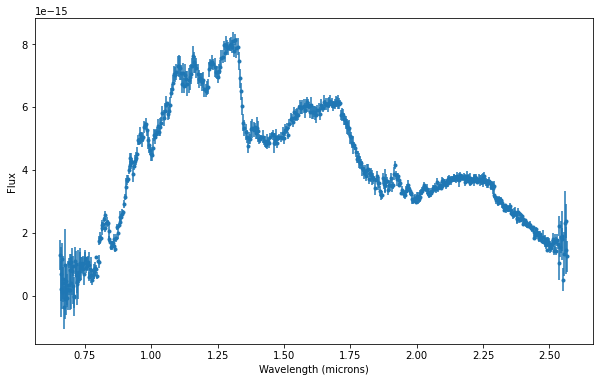

10098_11657.fits


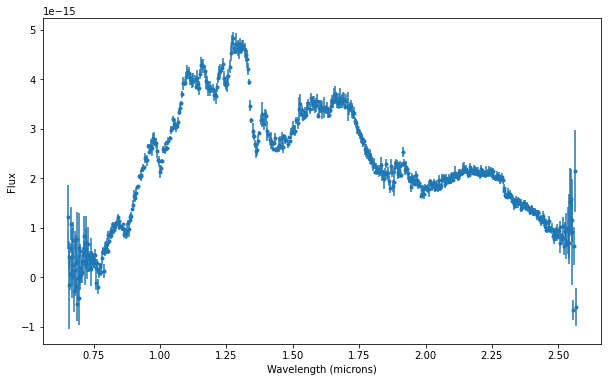

10107_10315.fits


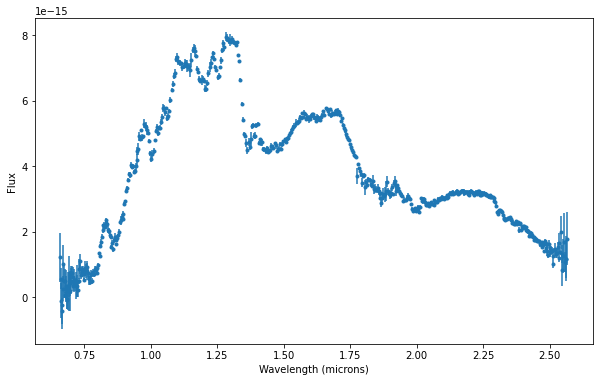

10747_10469.fits


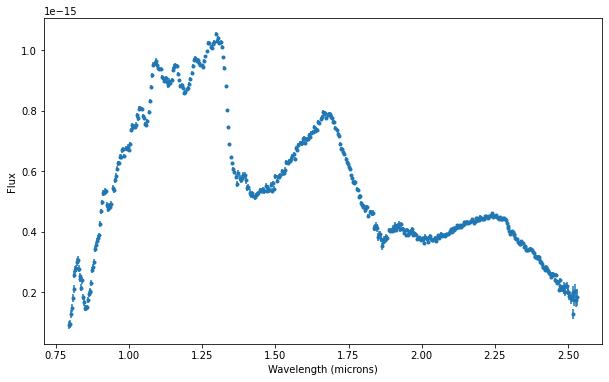

10755_10680.fits


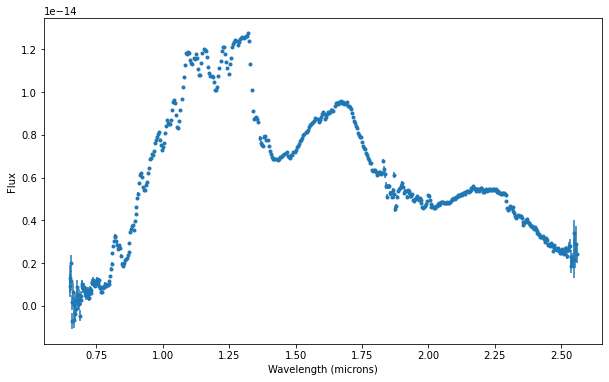

10845_10199.fits


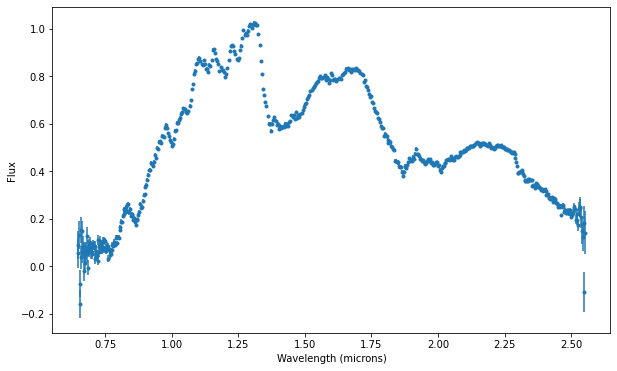

10980_10854.fits


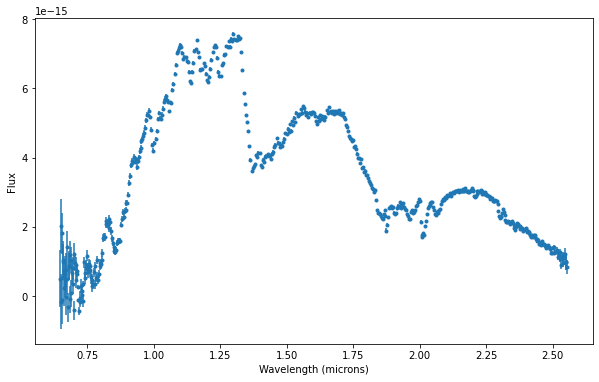

11008_11146.fits


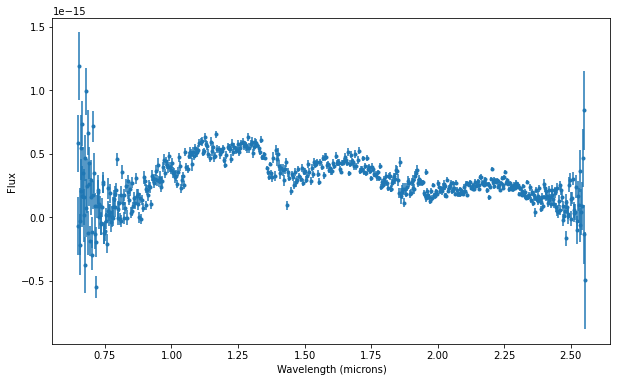

11076_10097.fits


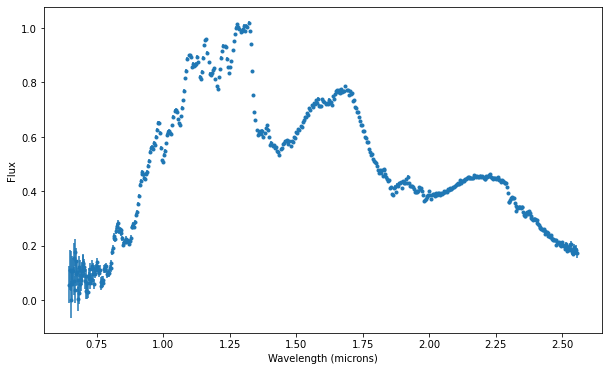

11100_11226.fits


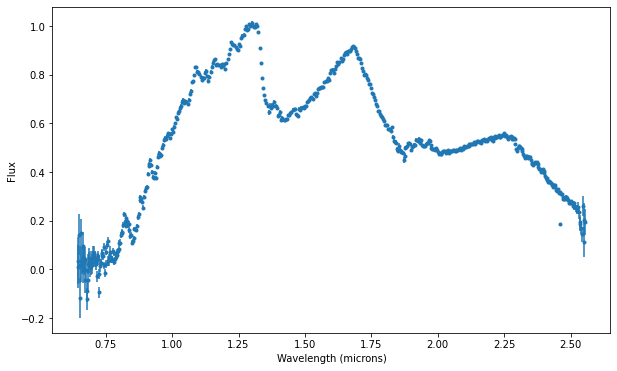

11109_11047.fits


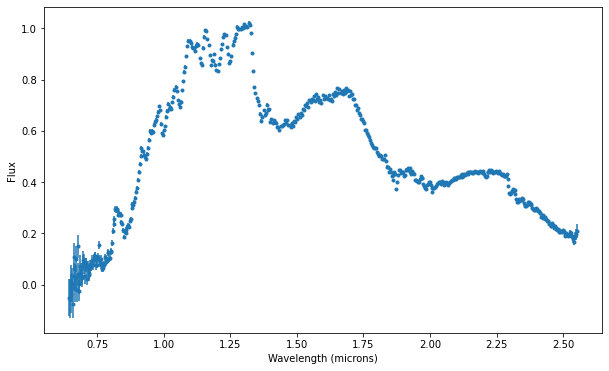

11230_10612.fits


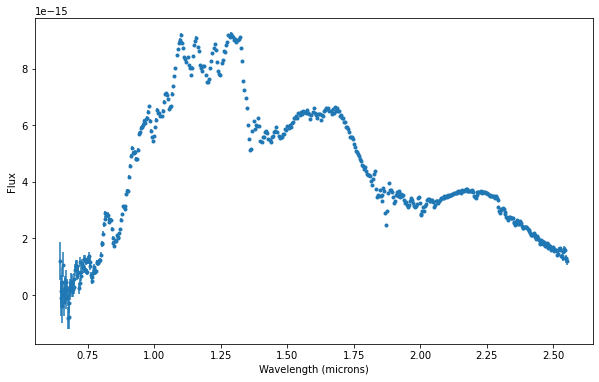

11234_11303.fits


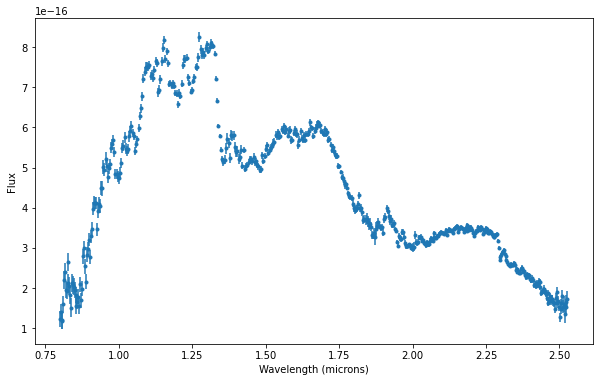

11242_11492.fits


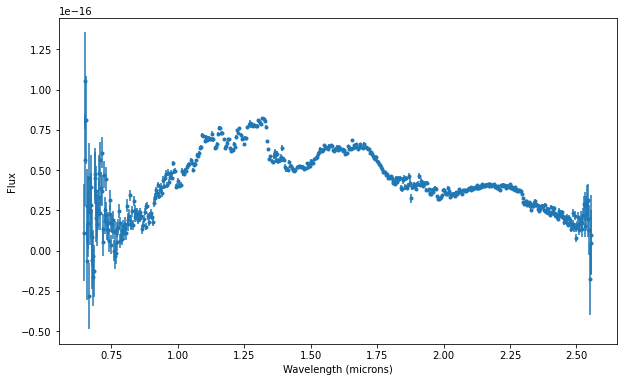

11243_11494.fits


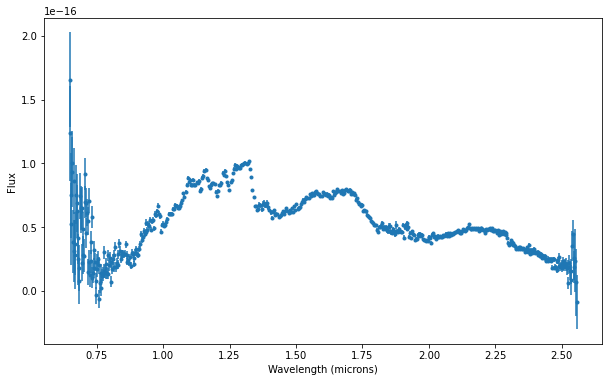

11268_10058.fits


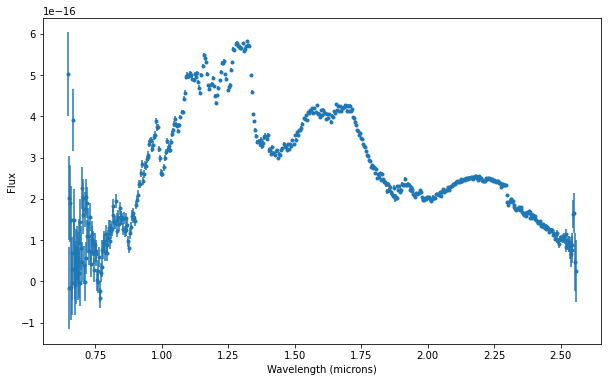

11286_11677.fits


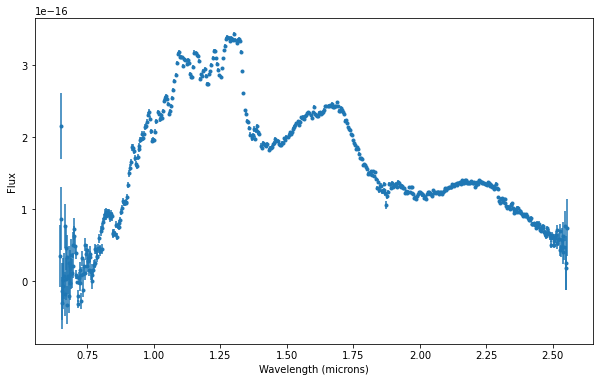

11291_11437.fits


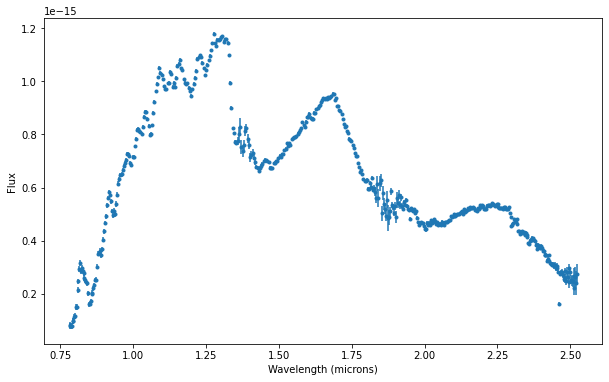

11292_11460.fits


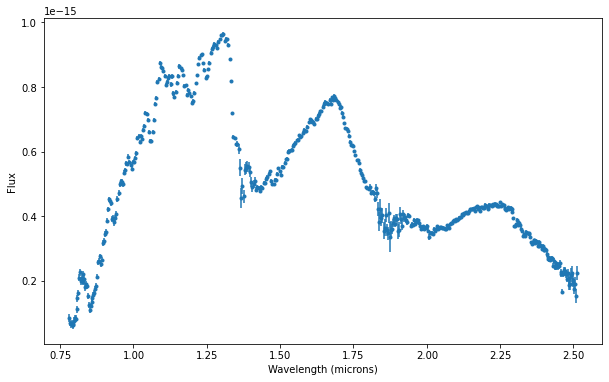

11554_11419.fits


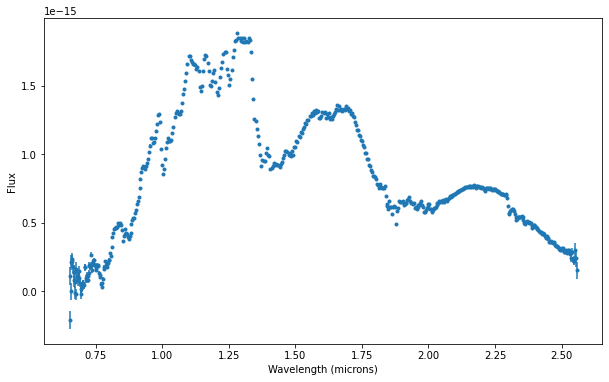

11604_10430.fits


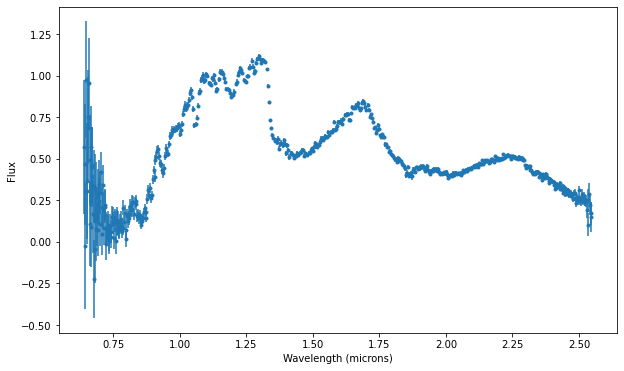

11624_10752.fits


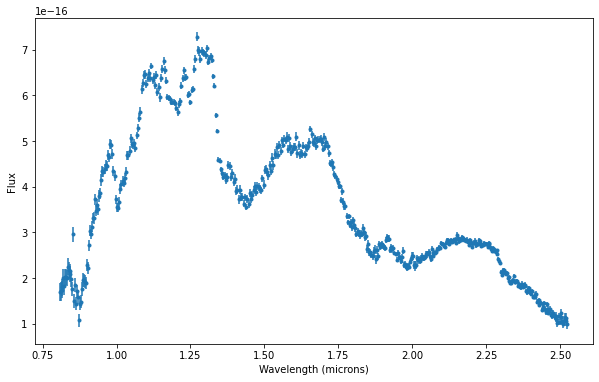

11636_11001.fits


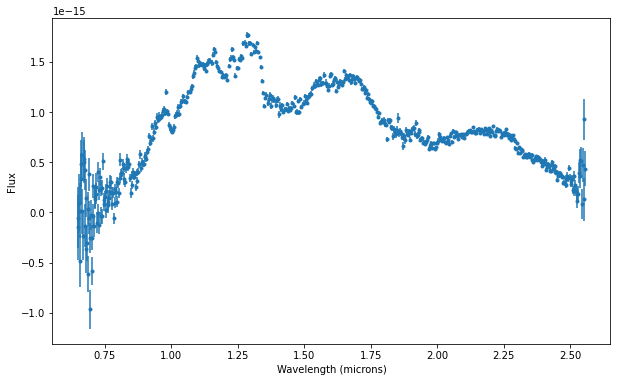

11658_11293.fits


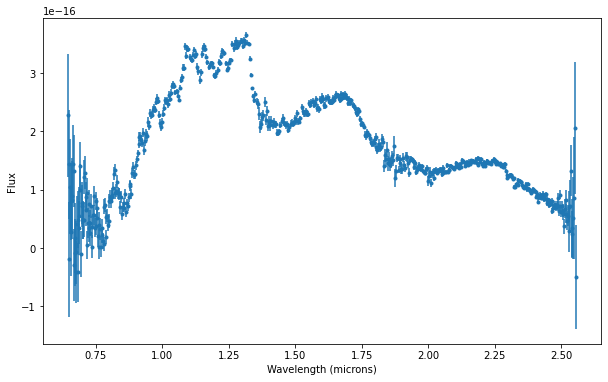

11694_10049.fits


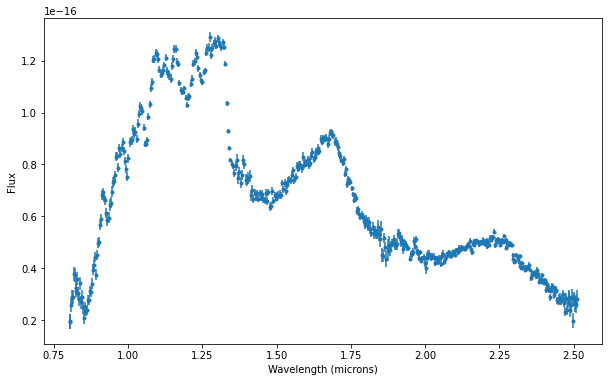

11802_11217.fits


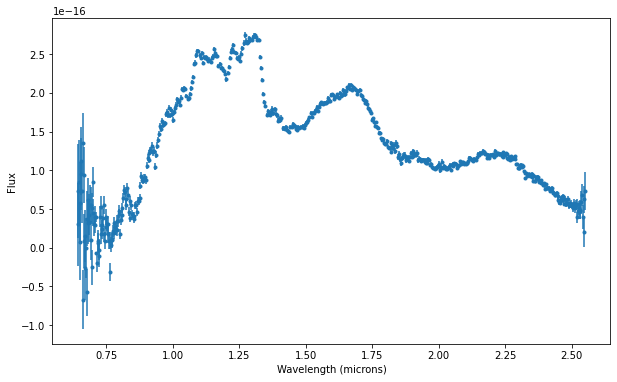

11840_10731.fits


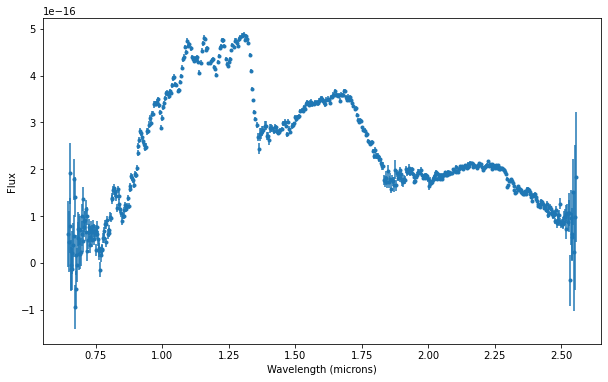

11926_10387.fits


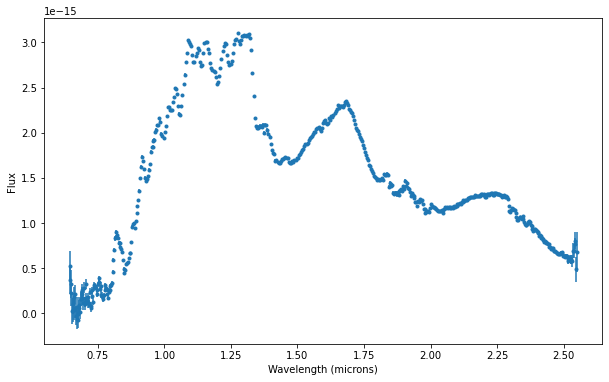

12196_11933.fits


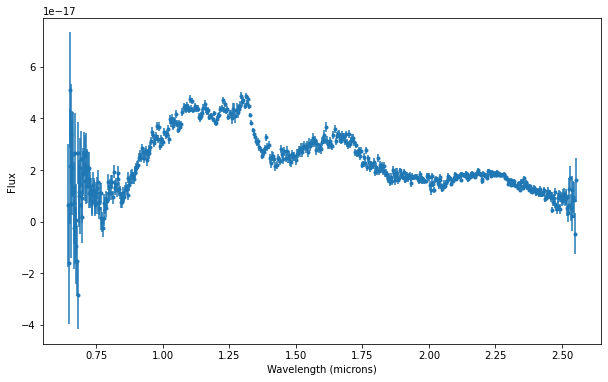

12227_11963.fits


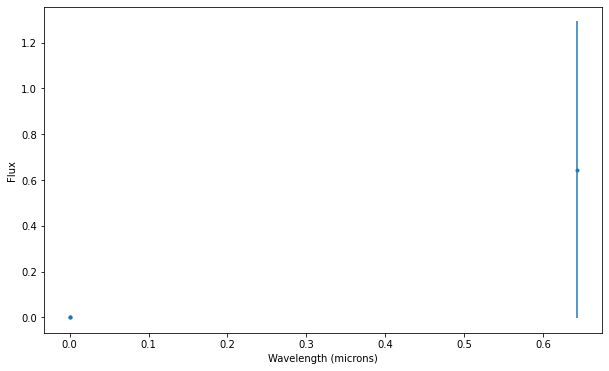

12344_12078.fits


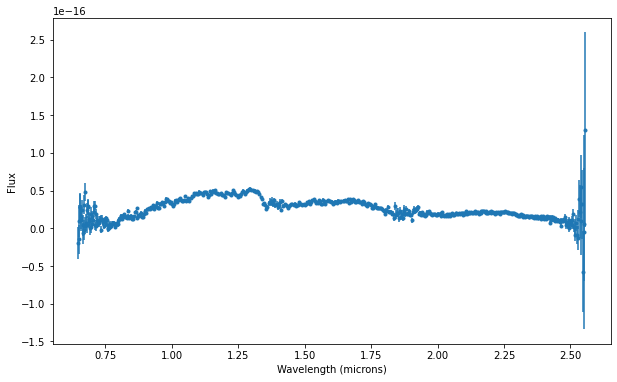

12409_12142.fits


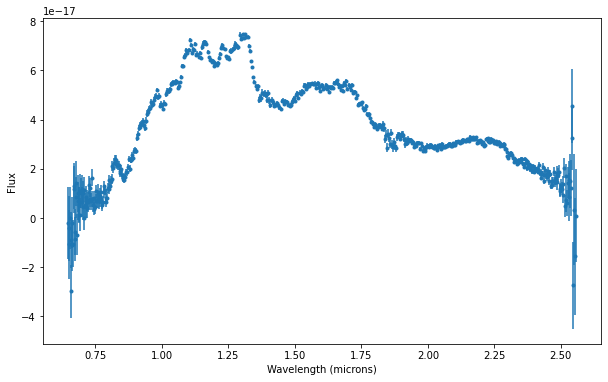

12424_12157.fits


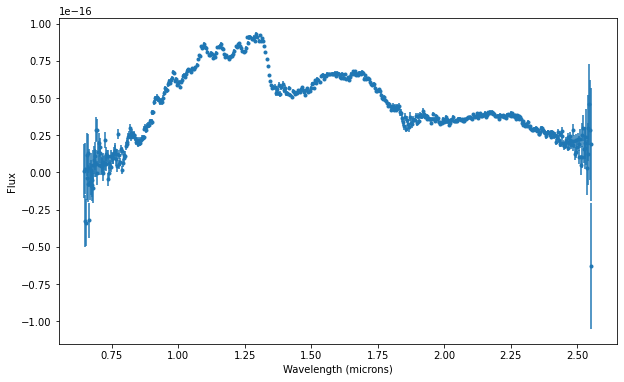

12453_12186.fits


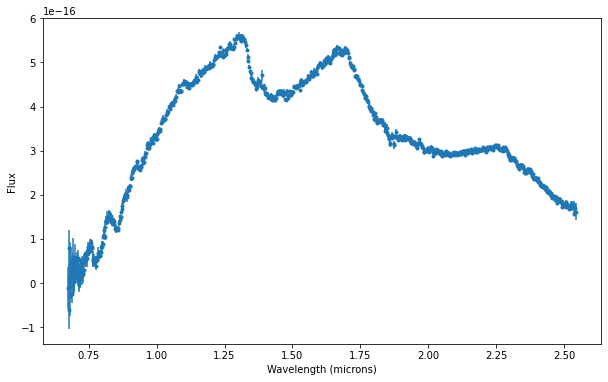

12462_12195.fits


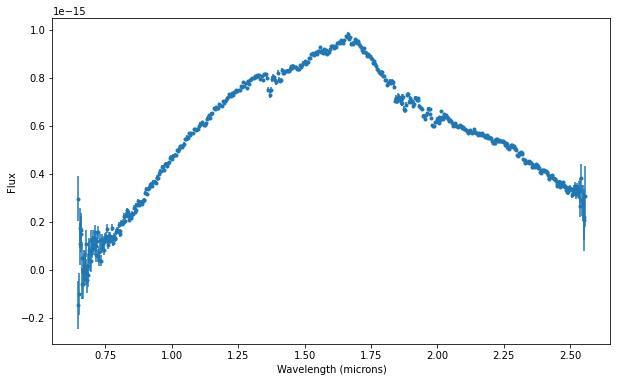

12468_12201.fits


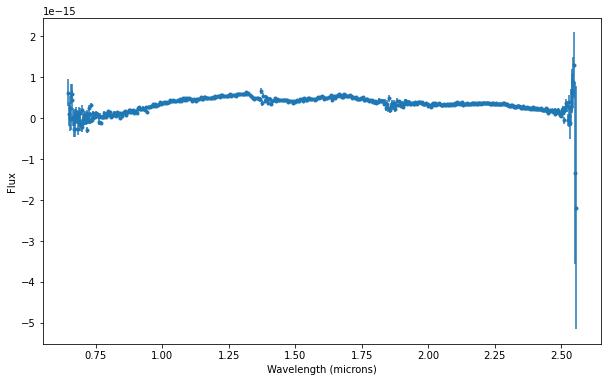

12473_12206.fits


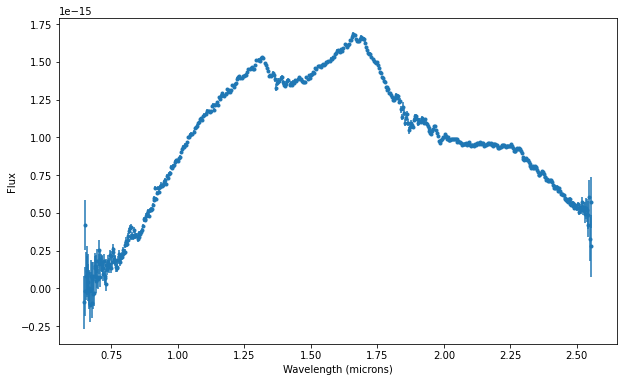

12478_12211.fits


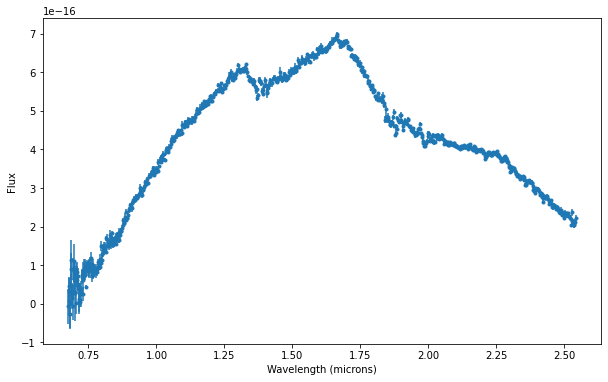

12488_12221.fits


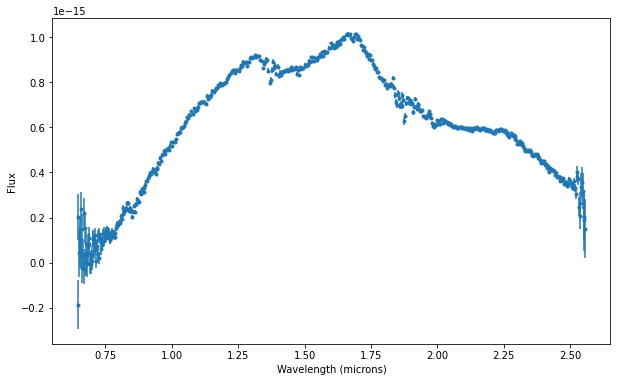

12491_12224.fits


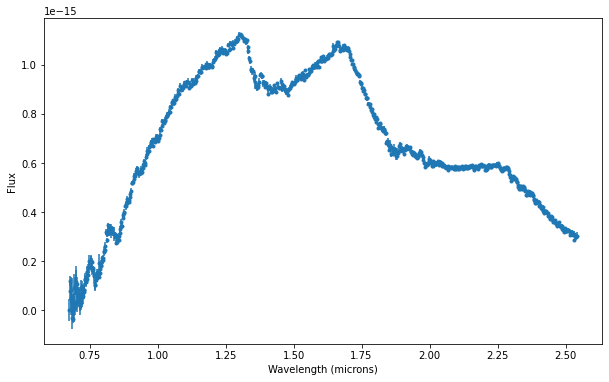

12502_12235.fits


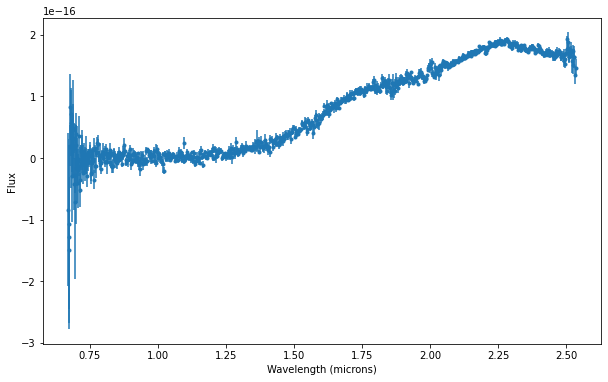

12505_12238.fits


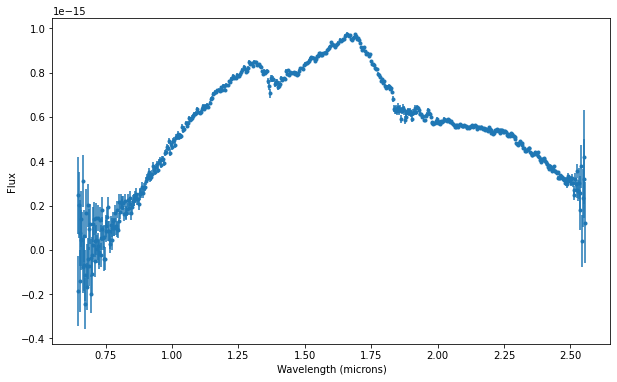

12512_12245.fits


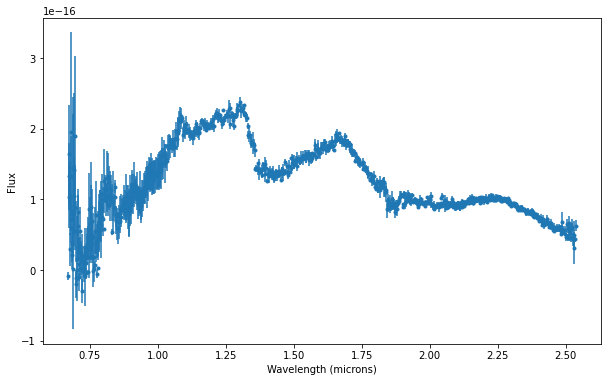

12515_12248.fits


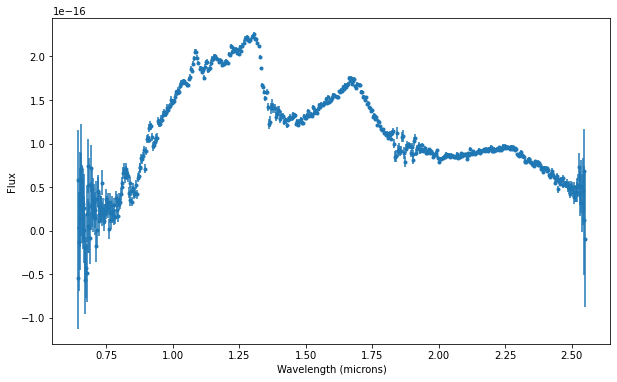

12516_12249.fits


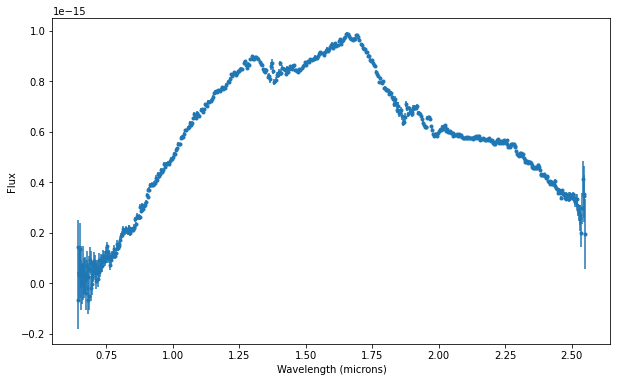

12531_12264.fits


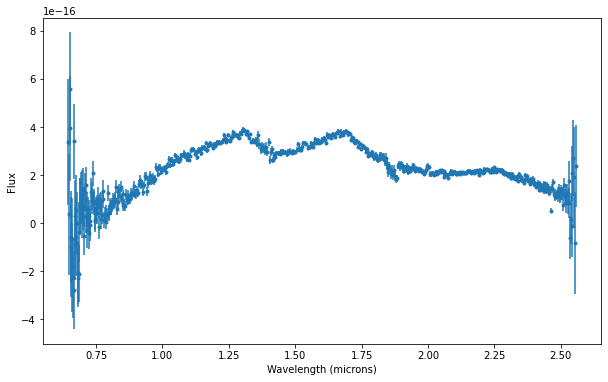

12537_12270.fits


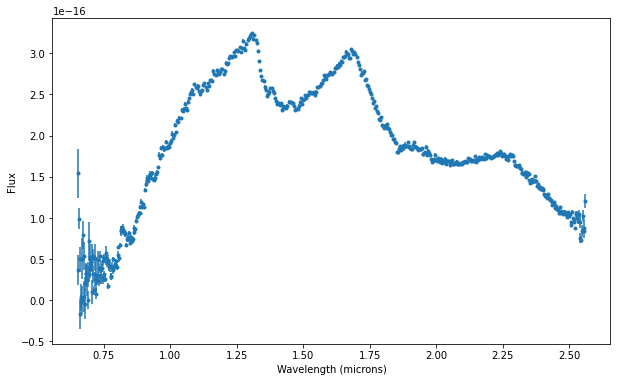

12664_12393.fits


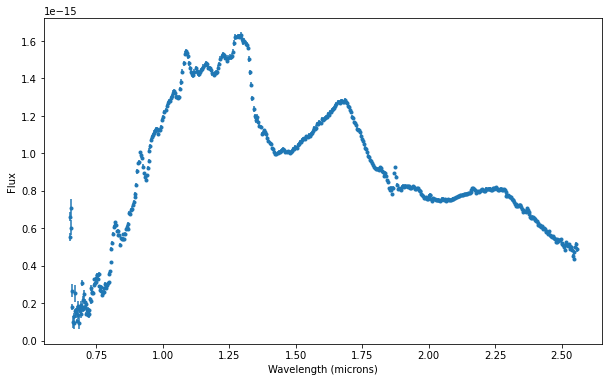

12671_12400.fits


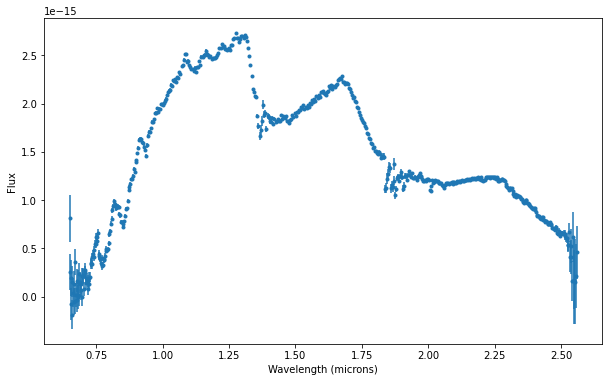

12720_10403.fits


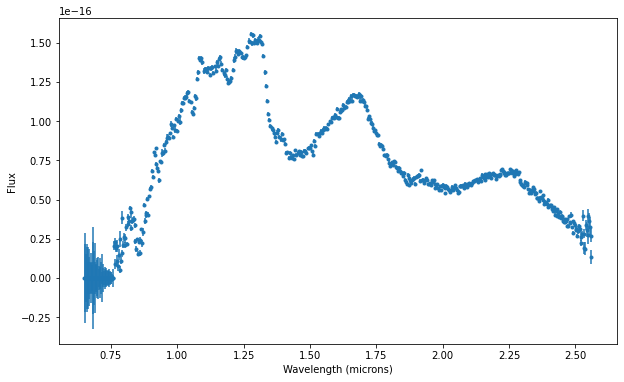

12731_10377.fits


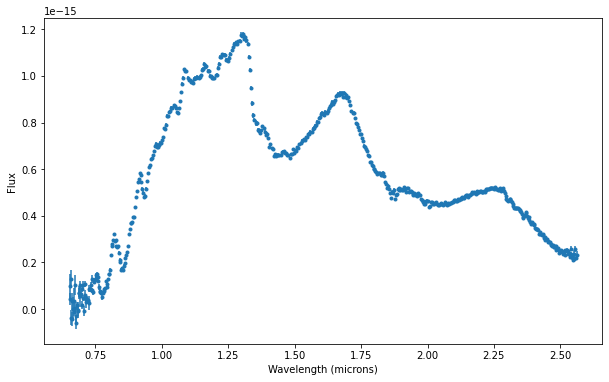

12803_10390.fits


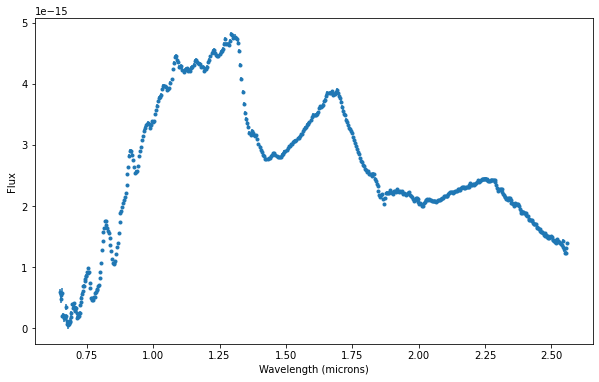

12808_10382.fits


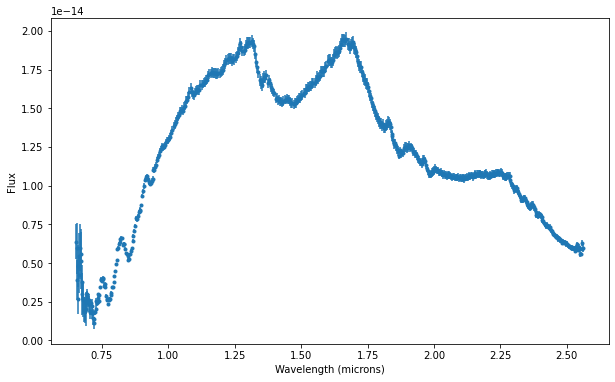

12809_10378.fits


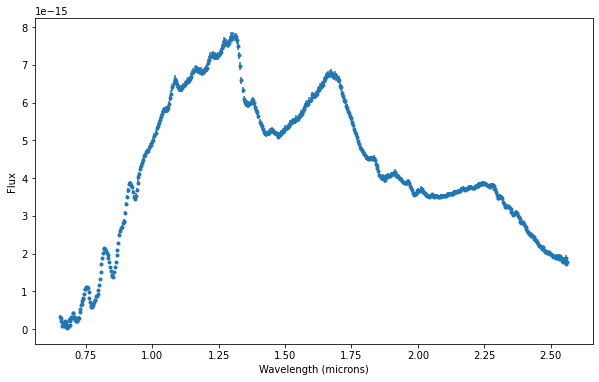

12812_10348.fits


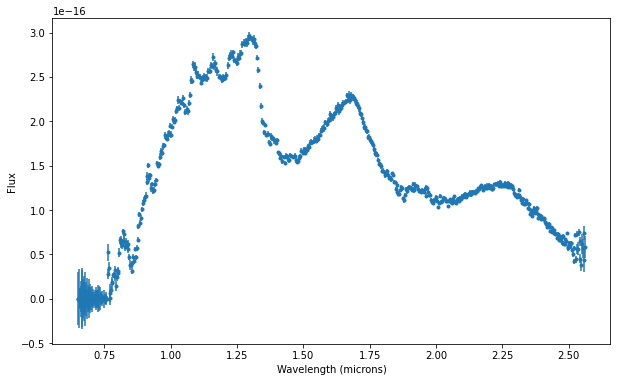

12819_10363.fits


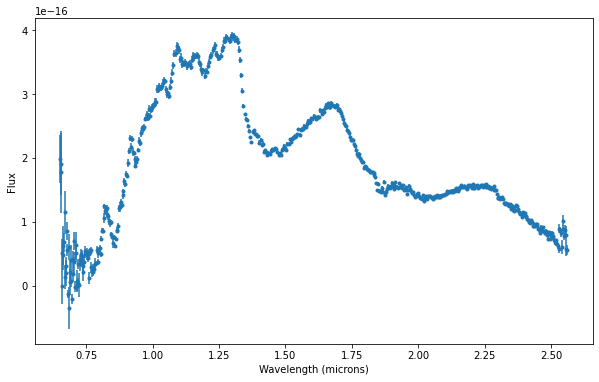

12821_10371.fits


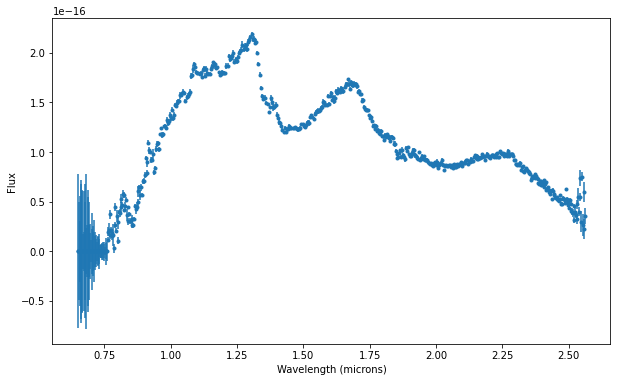

12847_12576.fits


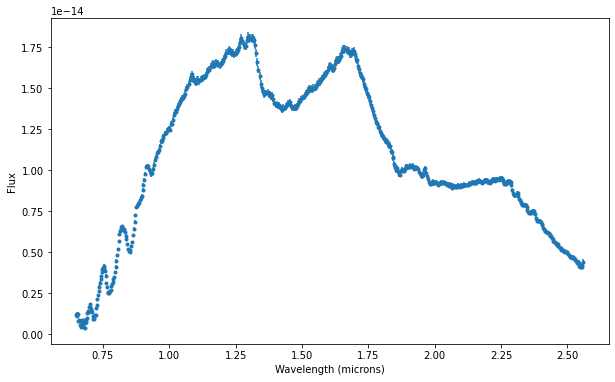

13038_12768.fits


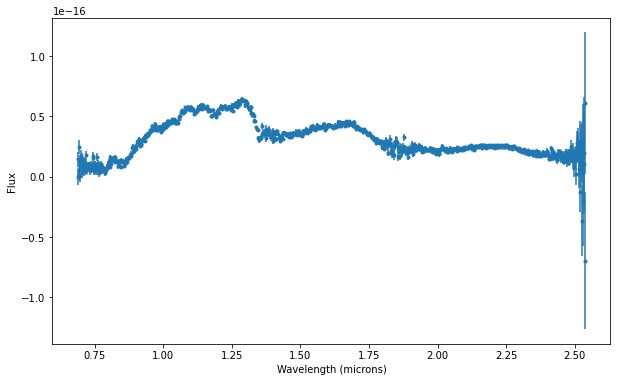

13049_12779.fits


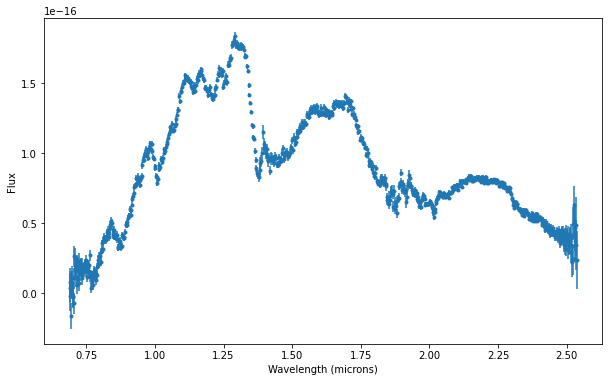

13052_12782.fits


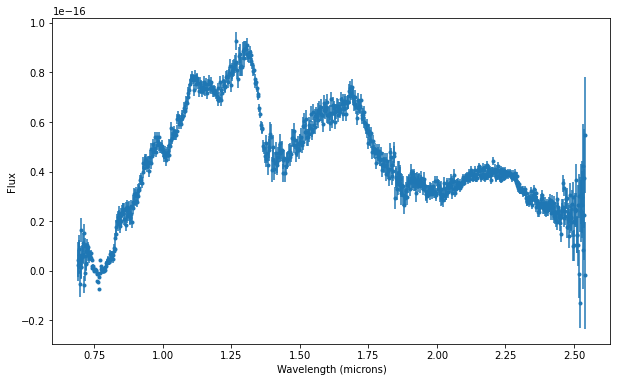

13054_12784.fits


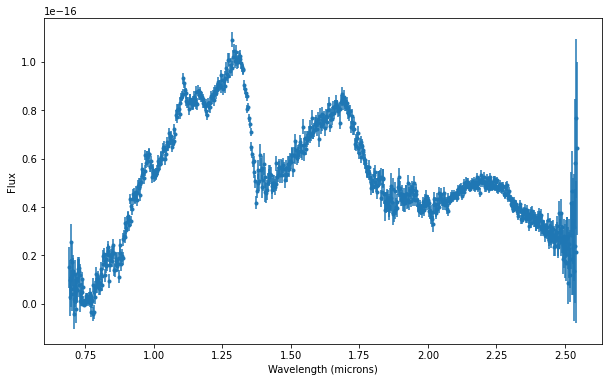

13065_12795.fits


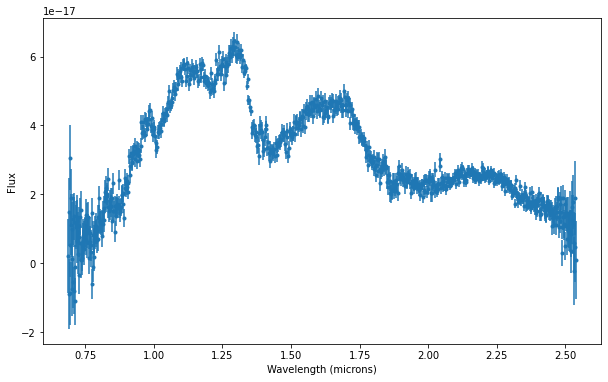

13067_12797.fits


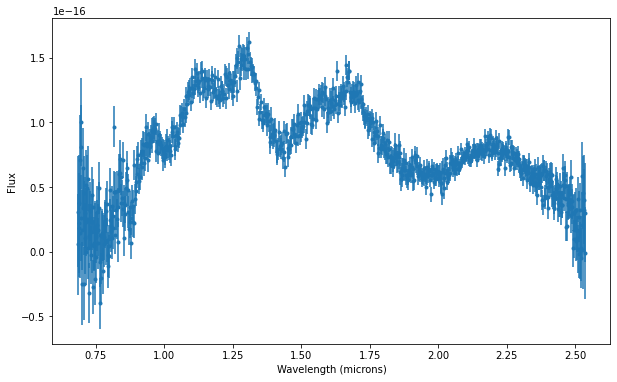

13070_12800.fits


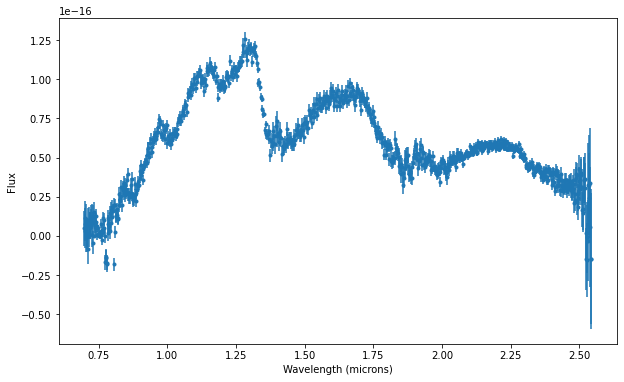

13077_12807.fits


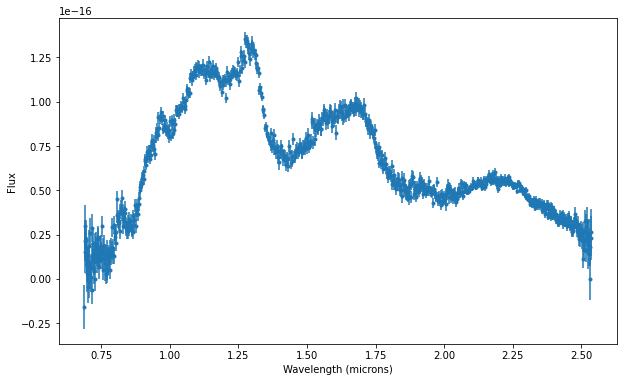

13083_12813.fits


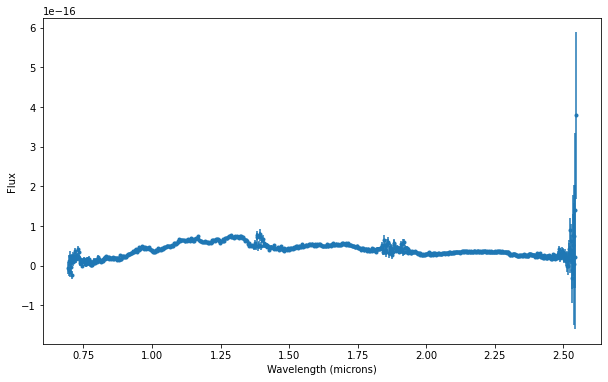

In [179]:
SpT = 'L0'
spex_dir = 'SPEX-PRISM'

with open(spex_dir+'/spectral_data.pkl', 'rb') as fp:
    SpT_data_dict = pickle.load(fp)

filenames = SpT_data_dict[SpT]

for filename in filenames:
    print(filename)
    hdul = FITS.open(spex_dir+'/'+filename)
    shape_data = np.shape(hdul[0].data)
    if len(shape_data) == 3:
        wav, flux, err = hdul[0].data[0][0], hdul[0].data[0][1], hdul[0].data[0][2]
    else:
        wav, flux, err = hdul[0].data[0], hdul[0].data[1], hdul[0].data[2]
    plt.figure(figsize=(10,6))
    plt.errorbar(wav, flux, err, fmt='.')

    plt.xlabel('Wavelength (microns)')
    plt.ylabel('Flux')
    plt.show()

# Old SpeX Prism library (obsolete)

In [66]:
dir_name = 'spex-prism_lib'
dir_files = os.listdir(dir_name)

for filename in dir_files:
    
    filename = os.getcwd()+'/'+dir_name+'/'+filename
    
    ### Read in data and comments

    # Read in comments
    with open(filename, 'r+') as f:
        data = f.readlines()

    comment_str = ''
    for line in data[1:]:
        if '#' in line:
            comment_str += line

    # Read in data
    df = pd.read_csv(filename, comment='#', delim_whitespace=True, header=None, names=['wav', 'flux', 'noise'])
    df.head()

    ### Read spectral type

    # Optical spectral type
    key_O = 'Optical spectral type: '
    index_O = comment_str.find(key_O)
    if index_O != -1:
        index_O = index_O + len(key_O)
        if (comment_str[index_O] not in set('LMT')) or (not comment_str[index_O+1].isdigit()):
            index_O = False
    else:
        index_O = False
    SpT_O = comment_str[index_O:index_O+2]
    
    # NIR spectral type
    key_NIR = 'Near infrared spectral type: '
    index_NIR = comment_str.find(key_NIR)
    if index_NIR != -1:
        index_NIR = index_NIR + len(key_NIR)
        if comment_str[index_NIR] not in set('LMT')  or (not comment_str[index_NIR+1].isdigit()):
            index_NIR = False
    else:
        index_NIR = False
    SpT_NIR = comment_str[index_NIR:index_NIR+2]
    
    
    print(filename)
    if index_O:
        print(key_O, SpT_O)
    if index_NIR:
        print(key_NIR, SpT_NIR)    

/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_2MASPJ0345432+254023__BUR06B.txt
Optical spectral type:  L0
Near infrared spectral type:  L1
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_2MASSIJ0103320+193536_20030919_CRU04A.txt
Optical spectral type:  L6
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_2MASSIJ0117474-340325_20060821_BUR08B.txt
Optical spectral type:  L2
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_2MASSIJ0241536-124106_20060820_BUR08B.txt
Optical spectral type:  L2
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_2MASSIJ0243137-245329_20030917_BUR04B.txt
Near infrared spectral type:  T6
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_2MASSIJ0328426+230205_20061223_BUR08B.txt
Optical spectral type:  L8
Near infrared spectral type:  L9
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_2MASSIJ0415195-093506_20030917_BUR04B.txt
Optical spectral type:  T8
Near infrared

/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_2MASSJ11395113-3159214_20070316_LOO07B.txt
Optical spectral type:  M9
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_2MASSJ11463232+0203414_20030522_BUR04B.txt
Near infrared spectral type:  M5
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_2MASSJ12070374-3151298_20050324_SEI07A.txt
Near infrared spectral type:  L3
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_2MASSJ12070374-3151298_20080109_BUR10A.txt
Near infrared spectral type:  L3
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_2MASSJ12095613-1004008_20030522_BUR04B.txt
Near infrared spectral type:  T3
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_2MASSJ12095613-1004008_20030523_BUR04B.txt
Near infrared spectral type:  T3
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_2MASSJ12121714-2253451_20030523_BUR04B.txt
Near infrared spectral type:  M7
/home/paiasnodkar.1/LamatProject2

/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_2MASSJ23515044-2537367_20051017_BUR08B.txt
Optical spectral type:  M8
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_2MASSJ23515044-2537367_20060903_BUR08B.txt
Optical spectral type:  M8
Near infrared spectral type:  M8
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_2MASSJ23515044-2537367__BUR08B.txt
Optical spectral type:  M8
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_2MASSWJ0030300-145033_20070728_BUR10A.txt
Optical spectral type:  L7
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_2MASSWJ0030300-145033_20071012_BUR10A.txt
Optical spectral type:  L7
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_2MASSWJ0036159+182110_20040907_BUR08B.txt
Optical spectral type:  L3
Near infrared spectral type:  L4
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_2MASSWJ0051107-154417_20080908_BUR10A.txt
Optical spectral type:  L3
/home/paiasnodk

/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_LHS3566_20030522_BUR04B.txt
Optical spectral type:  M6
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_LHS377_20040312_BUR04A.txt
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_LP508-14_20030521_BUR04B.txt
Optical spectral type:  M4
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_LP589-7_20040905_BUR06A.txt
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_LP944-20_20040907_BUR08B.txt
Optical spectral type:  M9
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_LP944-20__BUR08B.txt
Optical spectral type:  M9
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_LRL405__MUE07A.txt
Optical spectral type:  M8
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_LSR1826+3014_20030521_BUR04B.txt
Optical spectral type:  M8
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_LSR2036+5059_20030918_BUR04B.txt
/home/paiasnodkar.1/Lama

/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_SDSSJ205235.31-160929.8_20070916_BUR08B.txt
Near infrared spectral type:  T1
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_SDSSJ205235.31-160929.8_20080712_BUR10A.txt
Near infrared spectral type:  T1
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_SDSSJ212413.89+010000.3_20040723_BUR06C.txt
Near infrared spectral type:  T5
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_SDSSJ212413.89+010000.3_20050811_CHI06A.txt
Near infrared spectral type:  T5
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_SDSSJ213154.43-011939.3_20050811_CHI06A.txt
Near infrared spectral type:  L9
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_SDSSJ213240.36+102949.4_20050813_CHI06A.txt
Near infrared spectral type:  L4
/home/paiasnodkar.1/LamatProject2023/spex-prism_lib/spex-prism_SDSSJ213352.72+101841.0_20050813_CHI06A.txt
Near infrared spectral type:  L5
/home/paiasnodkar.1/